<a href="https://colab.research.google.com/github/heidyyy/BostonHousing/blob/main/%E2%80%9CMinxi_Duan_(Heidy)_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Copyright

<PRE>
Copyright (c) 2020 Bálint Gyires-Tóth - All Rights Reserved
You may use and modify this code for research and development purpuses.
Use this code for educational purposes (self-paced or instructor led) without the permission of the author is prohibited.
</PRE>



# Boston housing prices - modeling
In this notebook we will: 
* using Boston housing data (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)
* exploring the data
* creating a model
* training the model
* evaluation on test data
* making predictions and regression plot

Assigment: 
* please complete TODO parts


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.datasets import load_boston

In [43]:
#extra import 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [44]:
# load the boston housing data seet and return x y
X, Y = load_boston(return_X_y=True)
boston_X = X.shape[0]

Splitting data into training, validation and test sets:

In [45]:

# task 1
valid_split = 0.2
test_split  = 0.1

v_split = int(X.shape[0]*(1-valid_split-test_split))
t_split = int(X.shape[0]*(1-test_split))

X_train, Y_train  = X[:v_split], Y[:v_split]
X_valid, Y_valid  = X[v_split:t_split], Y[v_split:t_split]
X_test , Y_test   = X[t_split:], Y[t_split:]


Standardization of the data:

In [46]:
X_train.shape

(354, 13)

In [47]:
# standardization
scaler  = preprocessing.StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

Defining the model (with one or two hidden layers and 8-64 neurons / layer, the input and output layers' sizes are defined by the data):

In [48]:
model = Sequential()

# Boston Housing Prices, target: Price => Y = 5.0 ... 30.0 => regression
#  - number of neurons at the output: 1 (as we have only one target)
#  - activation function at the output: linear
#  - loss function: MSE
# regression
model.add(Dense(60, input_shape=(X_train.shape[1],), activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))
model.add(Dense(1, activation='linear', kernel_initializer='he_normal'))

Inspect the model summary:

In [49]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 60)                840       
_________________________________________________________________
dense_7 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


Number of trainable parameters in the model: 1741

Compiling the model:

In [50]:
#  - loss function: MSE
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.01))

Defining the earlystopping callback function:

In [51]:
earlystopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)

Train the model, use training and validation data and apply early stopping:

In [52]:
model.fit(X_train, Y_train,
          epochs=1000000000000000, 
          callbacks=[earlystopping],
          batch_size=256, shuffle=True,  
          validation_split=0.2)

Epoch 1/1000000000000000
2/2 [==============================] - 1s 139ms/step - loss: 712.1352 - val_loss: 526.2438
Epoch 2/1000000000000000
2/2 [==============================] - 0s 22ms/step - loss: 646.8448 - val_loss: 473.0222
Epoch 3/1000000000000000
2/2 [==============================] - 0s 23ms/step - loss: 590.3541 - val_loss: 430.6227
Epoch 4/1000000000000000
2/2 [==============================] - 0s 21ms/step - loss: 545.5370 - val_loss: 398.5705
Epoch 5/1000000000000000
2/2 [==============================] - 0s 23ms/step - loss: 511.2656 - val_loss: 374.1426
Epoch 6/1000000000000000
2/2 [==============================] - 0s 22ms/step - loss: 484.7387 - val_loss: 354.5085
Epoch 7/1000000000000000
2/2 [==============================] - 0s 23ms/step - loss: 463.1015 - val_loss: 337.5774
Epoch 8/1000000000000000
2/2 [==============================] - 0s 22ms/step - loss: 444.5123 - val_loss: 322.2815
Epoch 9/1000000000000000
2/2 [==============================] - 0s 22ms/step - 

Evaluate on the test data:

In [53]:
print(model.evaluate(X_test,Y_test))

2/2 [==============================] - 0s 7ms/step - loss: 12.1325
12.132474899291992


Make predictions:

In [54]:
preds = model.predict(X_test)

Inspecting the result on a regression plot:

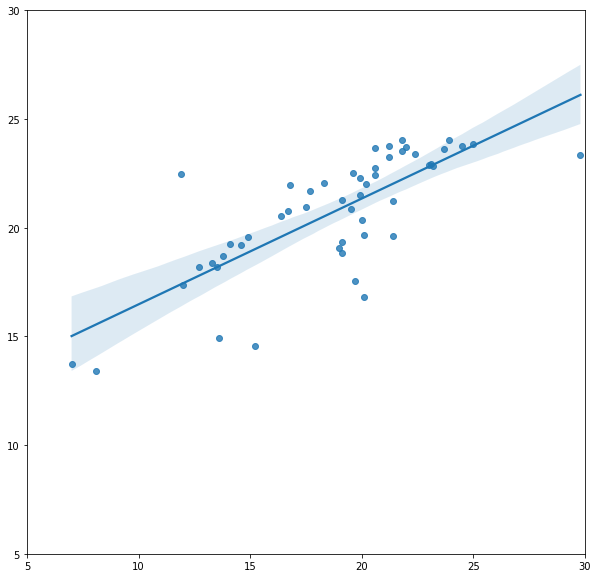

In [55]:
plt.figure(figsize=(10,10))
sns.regplot(x=Y_test.reshape(-1), y=preds.reshape(-1)).set(xlim=(5,30),ylim=(5,30)); 

In [56]:
# from sklearn.linear_model import LinearRegression
# from sklearn import metrics
# # Create a Linear regressor
# lm = LinearRegression()

# # Train the model using the training sets 
# lm.fit(X_train, Y_train)

# y_pred = lm.predict(X_train)
# print('MSE:',metrics.mean_squared_error(Y_train, y_pred))

In [57]:
# sns.distplot(Y_train-y_pred)
# plt.title("Histogram of Residuals")
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.show()

In [58]:
for i in range(len(preds)):
  print("X1: %.2f\tX2: %.2f\tY: %d\tPred: %.2f" % (X_test[i,0], X_test[i,1], Y_test[i], preds[i]))

X1: 6.81	X2: -0.61	Y: 14	Pred: 19.24
X1: 6.68	X2: -0.61	Y: 12	Pred: 18.17
X1: 12.21	X2: -0.61	Y: 13	Pred: 18.19
X1: 11.51	X2: -0.61	Y: 14	Pred: 19.58
X1: 10.02	X2: -0.61	Y: 20	Pred: 20.35
X1: 6.91	X2: -0.61	Y: 16	Pred: 20.55
X1: 5.16	X2: -0.61	Y: 17	Pred: 21.67
X1: 9.79	X2: -0.61	Y: 19	Pred: 20.88
X1: 8.49	X2: -0.61	Y: 20	Pred: 21.99
X1: 11.65	X2: -0.61	Y: 21	Pred: 21.20
X1: 4.33	X2: -0.61	Y: 19	Pred: 22.27
X1: 5.28	X2: -0.61	Y: 19	Pred: 19.08
X1: 6.30	X2: -0.61	Y: 19	Pred: 19.34
X1: 23.76	X2: -0.61	Y: 19	Pred: 18.85
X1: 19.84	X2: -0.61	Y: 20	Pred: 19.67
X1: 6.18	X2: -0.61	Y: 19	Pred: 21.51
X1: 5.70	X2: -0.61	Y: 19	Pred: 22.53
X1: 4.96	X2: -0.61	Y: 23	Pred: 22.83
X1: 6.65	X2: -0.61	Y: 29	Pred: 23.33
X1: 11.99	X2: -0.61	Y: 13	Pred: 18.69
X1: 9.38	X2: -0.61	Y: 13	Pred: 18.39
X1: 7.00	X2: -0.61	Y: 16	Pred: 20.77
X1: 22.89	X2: -0.61	Y: 12	Pred: 17.36
X1: 15.39	X2: -0.61	Y: 14	Pred: 19.21
X1: 21.81	X2: -0.61	Y: 21	Pred: 19.62
X1: 8.49	X2: -0.61	Y: 23	Pred: 22.88
X1: 8.31	X2: -0.61	Y: 23	Pre